# Experiment parameters

In [ ]:
window_size = 288
train_prop = 0.8

# Load historical price data

In [3]:
import pandas as pd
import numpy as np

In [4]:
BTC_data = pd.read_csv('binance_datasets/BTC_data.csv')
ETH_data = pd.read_csv('binance_datasets/ETH_data.csv')

In [5]:
BTC_data.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-01-01 00:00:00,7195.24,7196.25,7178.64,7179.78,95.509133,1577837099999,686317.136252,1127,32.773245,235537.295045,0
1,2020-01-01 00:05:00,7179.76,7191.77,7178.20,7191.07,59.365225,1577837399999,426481.260364,631,24.766513,177935.618201,0
2,2020-01-01 00:10:00,7193.15,7193.53,7180.24,7180.97,48.068510,1577837699999,345446.503019,694,19.422283,139596.621683,0
3,2020-01-01 00:15:00,7180.97,7186.40,7177.35,7178.29,32.192929,1577837999999,231162.555424,576,12.963258,93091.433276,0
4,2020-01-01 00:20:00,7177.71,7182.46,7175.47,7176.96,49.027397,1577838299999,351927.893881,710,22.819744,163817.881155,0


In [5]:
ETH_data.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-01-01 00:00:00,129.16,129.19,128.80,128.88,696.71412,1577837099999,89878.706140,278,374.55660,48313.962330,0
1,2020-01-01 00:05:00,128.84,128.95,128.69,128.93,724.37040,1577837399999,93302.364520,298,277.02182,35691.253799,0
2,2020-01-01 00:10:00,128.93,128.98,128.80,128.91,462.49462,1577837699999,59607.158976,203,223.12403,28749.907229,0
3,2020-01-01 00:15:00,128.91,129.05,128.84,128.85,360.50849,1577837999999,46478.320289,224,223.46932,28810.088623,0
4,2020-01-01 00:20:00,128.85,128.91,128.69,128.72,1827.53848,1577838299999,235286.623182,244,917.60510,118124.990547,0


In [6]:
# Limit dataset to specific time frame
start_time = "	2020-01-01 00:00:00"
end_time = "2021-01-01 00:00:00"

if start_time is not None and end_time is not None:
    BTC_data = BTC_data[(BTC_data['timestamp'] >= start_time) & (BTC_data['timestamp'] <= end_time)]
    ETH_data = ETH_data[(ETH_data['timestamp'] >= start_time) & (ETH_data['timestamp'] <= end_time)]

In [7]:
print(f"Length of BTC data: {len(BTC_data)}")
print(f"Length of ETH data: {len(ETH_data)}")

Length of BTC data: 105261
Length of ETH data: 105261


In [8]:
# Get the closing prices
BTC_close = BTC_data['close']
ETH_close = ETH_data['close']

# Create closing prices matrix
closing_prices = np.column_stack((BTC_close, ETH_close))
print(closing_prices.shape)

(105261, 2)


In [9]:
# Split the data into training and testing sets
train_size = int(train_prop * closing_prices.shape[0])
train_data = closing_prices[:train_size]
test_data = closing_prices[train_size:]

# Split original dataframes
BTC_train = BTC_data[:train_size]
BTC_test = BTC_data[train_size:]
ETH_train = ETH_data[:train_size]
ETH_test = ETH_data[train_size:]

print(f"Length of training data: {len(train_data)}")
print(f"Length of testing data: {len(test_data)}")

Length of training data: 52630
Length of testing data: 52631


# Save to json

In [39]:
from train_data_generation import create_train_json

# Create json sequences files for training and testing data
create_train_json(BTC_train, "binance_datasets/BTC_1_year_train.json", window_size=window_size, max_samples=np.inf)
create_train_json(ETH_train, "binance_datasets/ETH_1_year_train.json", window_size=window_size, max_samples=np.inf)

create_train_json(BTC_test, "binance_datasets/BTC_1_year_test.json", window_size=window_size, max_samples=np.inf)
create_train_json(ETH_test, "binance_datasets/ETH_1_year_test.json", window_size=window_size, max_samples=np.inf)

c:\Users\ahmed mansour\Desktop\EA IA g\rl-portfolio-reallocation\train_data_generation.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["timestamp"] = pd.to_datetime(df["timestamp"])
Processing: 100%|██████████| 52620/52620 [00:00<00:00, 324007.63 samples/s]
c:\Users\ahmed mansour\Desktop\EA IA g\rl-portfolio-reallocation\train_data_generation.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["timestamp"] = pd.to_datetime(df["timestamp"])


Saved 52568 samples to binance_datasets/BTC_1_year_train.json


Processing: 100%|██████████| 52620/52620 [00:00<00:00, 104501.07 samples/s]
c:\Users\ahmed mansour\Desktop\EA IA g\rl-portfolio-reallocation\train_data_generation.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["timestamp"] = pd.to_datetime(df["timestamp"])


Saved 52568 samples to binance_datasets/ETH_1_year_train.json


Processing: 100%|██████████| 52621/52621 [00:00<00:00, 251356.35 samples/s]
c:\Users\ahmed mansour\Desktop\EA IA g\rl-portfolio-reallocation\train_data_generation.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["timestamp"] = pd.to_datetime(df["timestamp"])


Saved 52568 samples to binance_datasets/BTC_1_year_test.json


Processing: 100%|██████████| 52621/52621 [00:00<00:00, 123759.15 samples/s]


Saved 52568 samples to binance_datasets/ETH_1_year_test.json


# Train binary-LSTM prediction model

Training data shape: (52567, 10, 1), Test data shape: (52567, 10, 1)
Positive samples in train: 26609.0/52567 (50.62%)
Positive samples in test: 26743.0/52567 (50.87%)
Created LSTM model with input_size=1, hidden_size=128, num_layers=2
Using device: cuda


c:\Users\ahmed mansour\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


[Epoch 1/5] Train Loss: 0.6976 | Train Acc: 0.5030 | Val Loss: 0.6939 | Val Acc: 0.5087
[Epoch 2/5] Train Loss: 0.6972 | Train Acc: 0.4946 | Val Loss: 0.6934 | Val Acc: 0.5087
[Epoch 3/5] Train Loss: 0.6960 | Train Acc: 0.4990 | Val Loss: 0.6935 | Val Acc: 0.5087
[Epoch 4/5] Train Loss: 0.6958 | Train Acc: 0.4992 | Val Loss: 0.6934 | Val Acc: 0.5087
[Epoch 5/5] Train Loss: 0.6957 | Train Acc: 0.4982 | Val Loss: 0.6935 | Val Acc: 0.5087


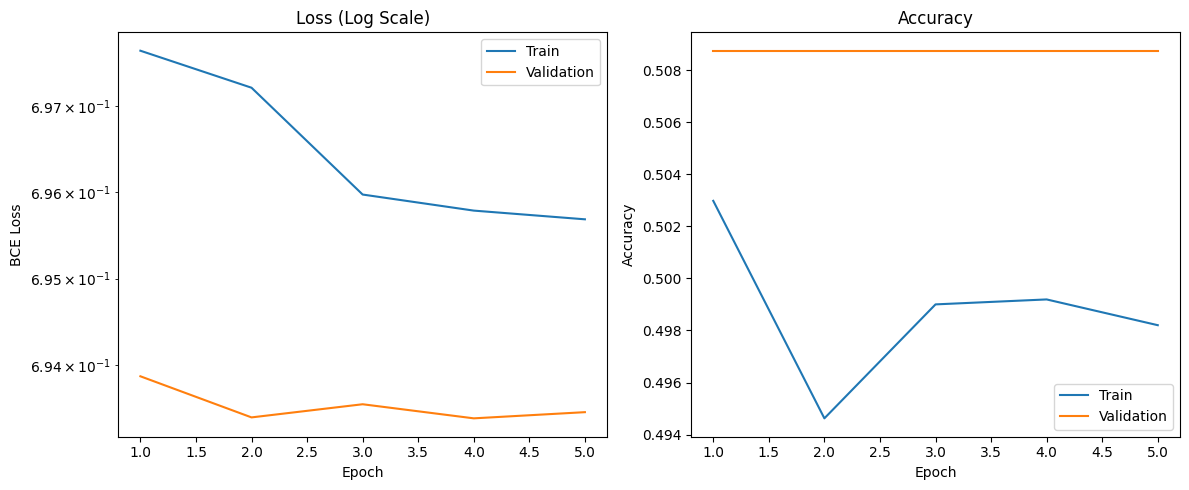


Evaluating model on test data:
Accuracy: 0.5087
ROC AUC: 0.4974
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     25824
         1.0       0.51      1.00      0.67     26743

    accuracy                           0.51     52567
   macro avg       0.25      0.50      0.34     52567
weighted avg       0.26      0.51      0.34     52567



c:\Users\ahmed mansour\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmed mansour\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmed mansour\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [40]:
import train_lstm_model

args = train_lstm_model.Args(
    model_path="models/btc_1_year_lstm_model.pth",
    train_path="binance_datasets/BTC_1_year_train.json",
    test_path="binance_datasets/BTC_1_year_test.json",
    epochs=5,
    lr=2e-5,
    hidden_size=128,
    num_layers=2,
    dropout=0.3,
    batch_size=64
)

trained_model = train_lstm_model.main(args)

# Train linear prediction model

In [53]:
import train_linear_model

args = train_linear_model.Args(
    model_path = "models/btc_1_year_linear_model.pth",
    train_path = "binance_datasets/BTC_1_year_train.json",
    test_path = "binance_datasets/BTC_1_year_test.json",
    epochs = 20,
    lr = 2*1e-5
)

[Epoch 1/20] Train MSE: 209560101.4369 | Val MSE: 586966376.6214
[Epoch 2/20] Train MSE: 199619157.4369 | Val MSE: 558883766.0583
[Epoch 3/20] Train MSE: 189947225.7864 | Val MSE: 531767864.9320
[Epoch 4/20] Train MSE: 180683124.5049 | Val MSE: 505597474.2524
[Epoch 5/20] Train MSE: 171715926.2913 | Val MSE: 480349043.5728
[Epoch 6/20] Train MSE: 163117456.5437 | Val MSE: 455971836.1165
[Epoch 7/20] Train MSE: 154756562.5631 | Val MSE: 432436897.3981
[Epoch 8/20] Train MSE: 146686610.5631 | Val MSE: 409720887.0680
[Epoch 9/20] Train MSE: 138935874.1748 | Val MSE: 387802445.4369
[Epoch 10/20] Train MSE: 131419996.2718 | Val MSE: 366640872.6214
[Epoch 11/20] Train MSE: 124190642.7961 | Val MSE: 346236078.9126
[Epoch 12/20] Train MSE: 117178322.3689 | Val MSE: 326553755.8058
[Epoch 13/20] Train MSE: 110431831.2233 | Val MSE: 307582364.1165
[Epoch 14/20] Train MSE: 103954732.4272 | Val MSE: 289315805.9029
[Epoch 15/20] Train MSE: 97722542.0194 | Val MSE: 271721391.8447
[Epoch 16/20] Train 

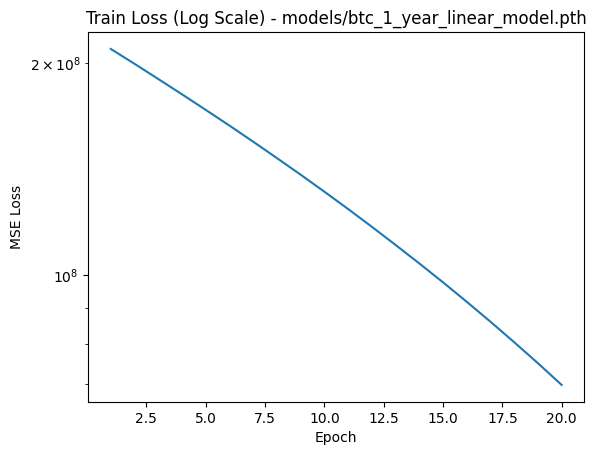

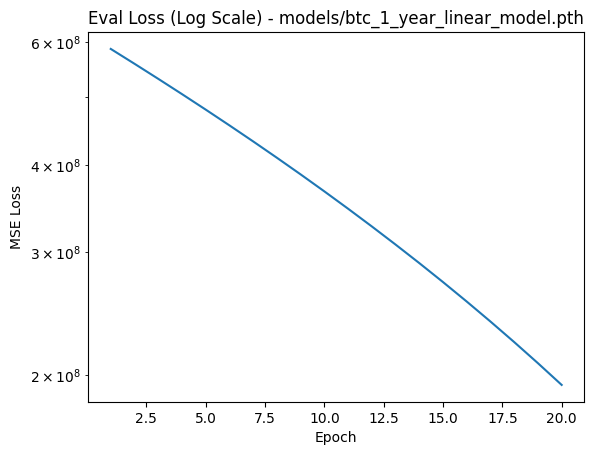

In [54]:
btc_linear_model = train_linear_model.main(args)

In [59]:
args = train_linear_model.Args(
    model_path = "models/eth_1_year_linear_model.pth",
    train_path = "binance_datasets/ETH_1_year_train.json",
    test_path = "binance_datasets/ETH_1_year_test.json",
    epochs = 10,
    lr = 2*1e-5
)

[Epoch 1/10] Train MSE: 164.5774 | Val MSE: 398.4480
[Epoch 2/10] Train MSE: 45.4052 | Val MSE: 87.3074
[Epoch 3/10] Train MSE: 9.2483 | Val MSE: 14.9223
[Epoch 4/10] Train MSE: 2.0061 | Val MSE: 4.8779
[Epoch 5/10] Train MSE: 1.1052 | Val MSE: 4.2201
[Epoch 6/10] Train MSE: 1.0379 | Val MSE: 4.2443
[Epoch 7/10] Train MSE: 1.0381 | Val MSE: 4.2552
[Epoch 8/10] Train MSE: 1.0408 | Val MSE: 4.2539
[Epoch 9/10] Train MSE: 1.0352 | Val MSE: 4.2611
[Epoch 10/10] Train MSE: 1.0361 | Val MSE: 4.2557


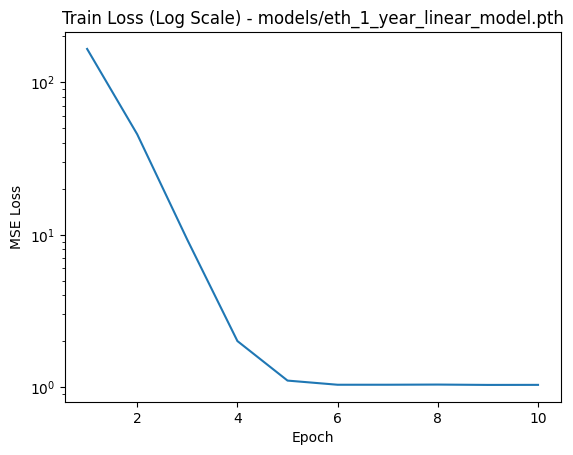

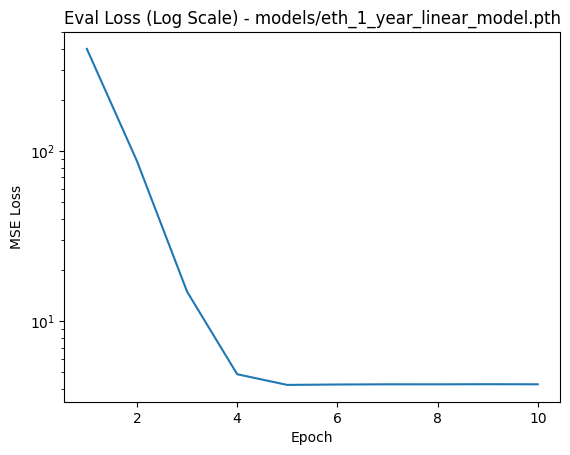

In [60]:
eth_linear_model = train_linear_model.main(args)

# Run training experiment

In [10]:
import ppo
import torch
import torch.nn as nn

 PortfolioEnv-v0 successfully registered!


In [11]:
# Define the BtcLSTM class (same as in train_lstm_model.py)
class BtcLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=128, num_layers=2, dropout=0.3):
        super(BtcLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                           batch_first=True, dropout=dropout)
        
        # Add batch normalization for better training stability
        self.bn = nn.BatchNorm1d(hidden_size)
        
        # Multiple fully connected layers with dropout
        self.fc1 = nn.Linear(hidden_size, 64)
        self.dropout1 = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Get the last time step output
        out = out[:, -1, :]
        
        # Apply batch normalization
        out = self.bn(out)
        
        # Multiple layers with dropout
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        
        return out

# ----- Define prediction models for each asset -----

# Define window size and feature dimension
window_size = 10  # Replace with your actual window size
input_size = 1     # Number of features per time step (1 if just price)

# Define and load the BTC LSTM model
btc_lstm_model = BtcLSTM(input_size=input_size, hidden_size=128, num_layers=2, dropout=0.3)
btc_lstm_model.load_state_dict(torch.load("models/btc_1_year_lstm_model.pth"))
btc_lstm_model.to("cuda")  # Move model to GPU
btc_lstm_model.eval()  # Set to evaluation mode

# Define the prediction models list
#prediction_models = [btc_lstm_model, eth_lstm_model]
prediction_models = [btc_lstm_model, btc_lstm_model]

In [61]:
# Define prediction models for each asset
btc_linear_model = model = nn.Linear(in_features=window_size, out_features=1)
btc_linear_model.load_state_dict(torch.load("models/btc_1_year_linear_model.pth"))
btc_linear_model.to("cuda")  # Move model to GPU if needed

eth_linear_model = nn.Linear(in_features=window_size, out_features=1)  # Adjust input_dim
eth_linear_model.load_state_dict(torch.load("models/eth_1_year_linear_model.pth"))
eth_linear_model.to("cuda")

prediction_models = [btc_linear_model, eth_linear_model]


In [ ]:
# Experiment arguments
args = ppo.Args(
    exp_name="experiment_1_year_test_ahmed",         # name of this experiment
    seed=1,                          # random seed
    torch_deterministic=True,        # if True, sets torch.backends.cudnn.deterministic = False
    cuda=True,                       # if True, CUDA will be enabled by default
    track=False,                     # if True, track experiment with Weights & Biases

    # Environment specific arguments
    n_assets=2,                      # number of assets in the portfolio
    window_size=window_size,         # size of the historical‐price window (observation dimension)
    action_step_size=0.1,            # step size for actions
    episode_length=288,              # length of each episode
    reward_method="portfolio_value", # reward method: "portfolio_value" or "sharpe_ratio"
    g1=0.5,                          # weight for Sharpe ratio in combined reward
    g2=0.5,                          # weight for portfolio return in combined reward
    closing_prices=train_data,                    # array of historical closing prices for all assets
    prediction_method="directional",               # prediction method: "regression" or "directional"
    prediction_models=prediction_models,          # optional external model for price predictions

    # Algorithm specific arguments
    env_id="PortfolioEnv-v0",        # gym environment ID
    total_timesteps=500000,          # total timesteps for training
    learning_rate=1e-4,            # learning rate for the optimizer
    num_envs=8,                      # number of parallel environments
    num_steps=72,                    # steps per environment rollout before update
    anneal_lr=True,                  # if True, linearly anneals learning rate
    gamma=0.98,                      # discount factor for rewards
    gae_lambda=0.95,                 # lambda parameter for GAE (advantage estimation)
    num_minibatches=4,               # number of minibatches per update epoch
    update_epochs=4,                 # number of update epochs (K epochs in PPO)
    norm_adv=True,                   # if True, normalize advantages
    clip_coef=0.2,                   # clipping coefficient for PPO surrogate objective
    clip_vloss=True,                 # if True, clip value function updates
    ent_coef=0.01,                   # entropy bonus coefficient
    vf_coef=0.5,                     # value loss coefficient
    max_grad_norm=0.5,               # max gradient norm (gradient clipping)
    target_kl=None,                  # KL divergence threshold for early stopping

    # Computed at runtime
    batch_size=0,                    # batch size (computed internally from num_envs & num_steps)
    minibatch_size=0,                # minibatch size (computed internally)
    num_iterations=0                 # number of iterations (computed internally)
)


In [11]:
ppo.main(args)

NameError: name 'args' is not defined

# Evaluate model

In [10]:
import torch
import numpy as np
import pandas as pd
import gymnasium as gym
import ppo  # Import PPO script
from portfolio_env import make_wrapped_env
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Load the trained model
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

args.num_envs = 1 # Single environment for evaluation

envs = gym.vector.SyncVectorEnv(
        [ppo.make_env(args.env_id, args) for _ in range(1)]
    )


 PortfolioEnv-v0 successfully registered!


NameError: name 'args' is not defined

In [65]:

# Load trained PPO agent
agent = ppo.Agent(envs).to(device)
agent.load_state_dict(torch.load(f"models/ppo_agent_{args.exp_name}.pt"))
agent.eval()  # Set to evaluation mode


Agent(
  (critic): Sequential(
    (0): Linear(in_features=25, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
  (actor): Sequential(
    (0): Linear(in_features=25, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=66, bias=True)
  )
)

In [66]:

# -----------------------------
# 2️⃣ Load the test dataset
# -----------------------------

# Ensure dataset has enough data
assert test_data.shape[0] > envs.get_attr("episode_length")[0], "Test data is too short for evaluation!"


In [67]:
# -----------------------------
# 3️⃣ Run Evaluation Episodes
# -----------------------------

# Number of evaluation runs
num_eval_episodes = 20  

# Store results
results = []

for episode in range(num_eval_episodes):
    # Randomly select a time window
    start_time = np.random.randint(window_size, test_data.shape[0] - args.episode_length)
    test_window = test_data[start_time : start_time + args.episode_length]

    # Set closing prices for evaluation
    args.closing_prices = test_window

    # Reset the environment and get initial observation
    next_obs, _ = envs.reset()
    next_obs = torch.tensor(next_obs, dtype=torch.float32, device=device)  # Convert to Tensor

    next_done = torch.zeros(args.num_envs).to(device)
    done = False
    total_reward = 0
    returns = []  # Track portfolio value over time
    portfolio_weights = []  # Track portfolio weights over time
    model_predictions = []  # Track model predictions over time
    real_prices = []  # Track real prices over time

    while not done:
        with torch.no_grad():
            action, _, _, _ = agent.get_action_and_value(next_obs)

        next_obs, reward, terminations, truncations, infos = envs.step(action.cpu().numpy())
        next_done = np.logical_or(terminations, truncations)

        total_reward += reward[0]  # Track reward
        next_obs = torch.tensor(next_obs, dtype=torch.float32, device=device)  # Ensure tensor format
        returns.append(envs.get_attr("historical_returns")[0][-1])  # Track portfolio value
        portfolio_weights.append(envs.get_attr("portfolio")[0])

        done = next_done[0]  # Check if the episode is done

    # Calculate final portfolio value & Sharpe ratio
    final_portfolio_value = returns[-2]
    mean_return = np.mean(returns)
    std_return = np.std(returns) + 1e-8  # Avoid division by zero
    sharpe_ratio = mean_return / std_return


    # Store results
    results.append({
        "returns": returns,
        "portfolio_weights": portfolio_weights,
        "episode": episode,
        "start_time": start_time,
        "final_value": final_portfolio_value,
        "sharpe_ratio": sharpe_ratio,
        "total_reward": total_reward
    })

    print(f"Episode {episode + 1}/{num_eval_episodes}: Final Value = {final_portfolio_value:.4f}, Sharpe Ratio = {sharpe_ratio:.4f}")

Episode 1/20: Final Value = 1.0040, Sharpe Ratio = 466.6283
Episode 2/20: Final Value = 0.9981, Sharpe Ratio = 974.3722
Episode 3/20: Final Value = 0.9991, Sharpe Ratio = 2249.0335
Episode 4/20: Final Value = 1.0003, Sharpe Ratio = 1109.9682
Episode 5/20: Final Value = 0.9984, Sharpe Ratio = 968.0426
Episode 6/20: Final Value = 0.9984, Sharpe Ratio = 658.3926
Episode 7/20: Final Value = 1.0065, Sharpe Ratio = 361.8038
Episode 8/20: Final Value = 1.0086, Sharpe Ratio = 353.6064
Episode 9/20: Final Value = 1.0006, Sharpe Ratio = 1496.4989
Episode 10/20: Final Value = 0.9980, Sharpe Ratio = 898.8759
Episode 11/20: Final Value = 1.0031, Sharpe Ratio = 862.4384
Episode 12/20: Final Value = 1.0008, Sharpe Ratio = 2177.1551
Episode 13/20: Final Value = 1.0011, Sharpe Ratio = 550.4152
Episode 14/20: Final Value = 1.0038, Sharpe Ratio = 981.8932
Episode 15/20: Final Value = 1.0082, Sharpe Ratio = 315.9067
Episode 16/20: Final Value = 1.0026, Sharpe Ratio = 1064.5671
Episode 17/20: Final Value =

                                    portfolio_weights  episode  start_time  \
0   [[0.2, 0.8, 0.0], [0.6000000000000001, 0.2, 0....        0        2314   
1   [[0.30000000000000004, 0.6000000000000001, 0.1...        1        3466   
2   [[0.0, 1.0, 0.0], [0.2, 0.8, 0.0], [0.9, 0.1, ...        2        7253   
3   [[0.0, 0.8, 0.2], [0.5, 0.30000000000000004, 0...        3       47837   
4   [[0.5, 0.2, 0.30000000000000004], [0.1, 0.6000...        4       41388   
5   [[0.5, 0.4, 0.1], [0.1, 0.0, 0.9], [0.2, 0.4, ...        5       31351   
6   [[0.6000000000000001, 0.2, 0.2], [0.4, 0.60000...        6       27679   
7   [[0.0, 0.6000000000000001, 0.4], [0.2, 0.30000...        7        6844   
8   [[0.6000000000000001, 0.2, 0.2], [0.2, 0.60000...        8       50101   
9   [[0.5, 0.4, 0.1], [0.2, 0.5, 0.300000000000000...        9       33449   
10  [[0.0, 0.1, 0.9], [0.4, 0.30000000000000004, 0...       10       16861   
11  [[0.5, 0.0, 0.5], [0.2, 0.5, 0.300000000000000...       11  

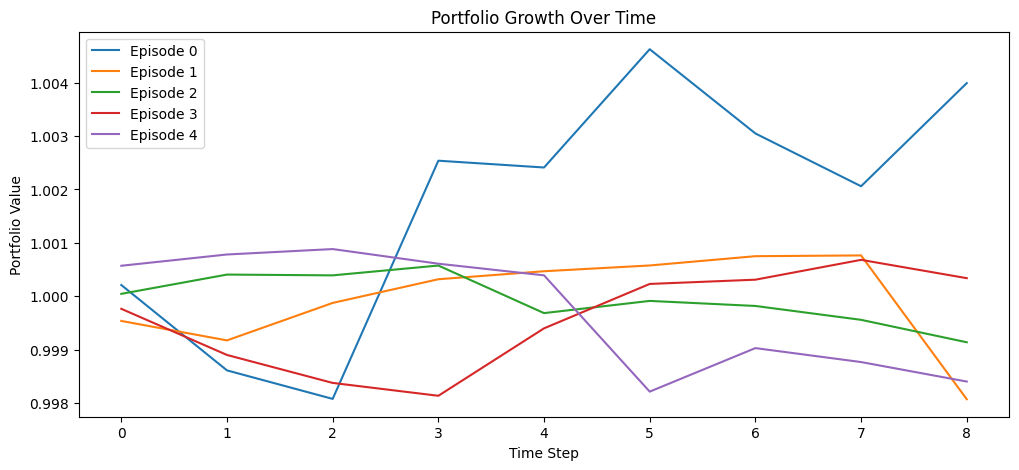

In [68]:
# -----------------------------
# 4️⃣ Display and Plot Results
# -----------------------------
df_results = pd.DataFrame(results).drop(columns=['returns'])
print(df_results)

# Plot portfolio values over time for a few episodes
plt.figure(figsize=(12, 5))
for i in range(min(5, num_eval_episodes)):  # Plot first 5 episodes
    returns = results[i]["returns"][:-1]
    plt.plot(range(len(returns)), returns, label=f"Episode {i}")

plt.xlabel("Time Step")
plt.ylabel("Portfolio Value")
plt.title("Portfolio Growth Over Time")
plt.legend()
plt.show()

envs.close()

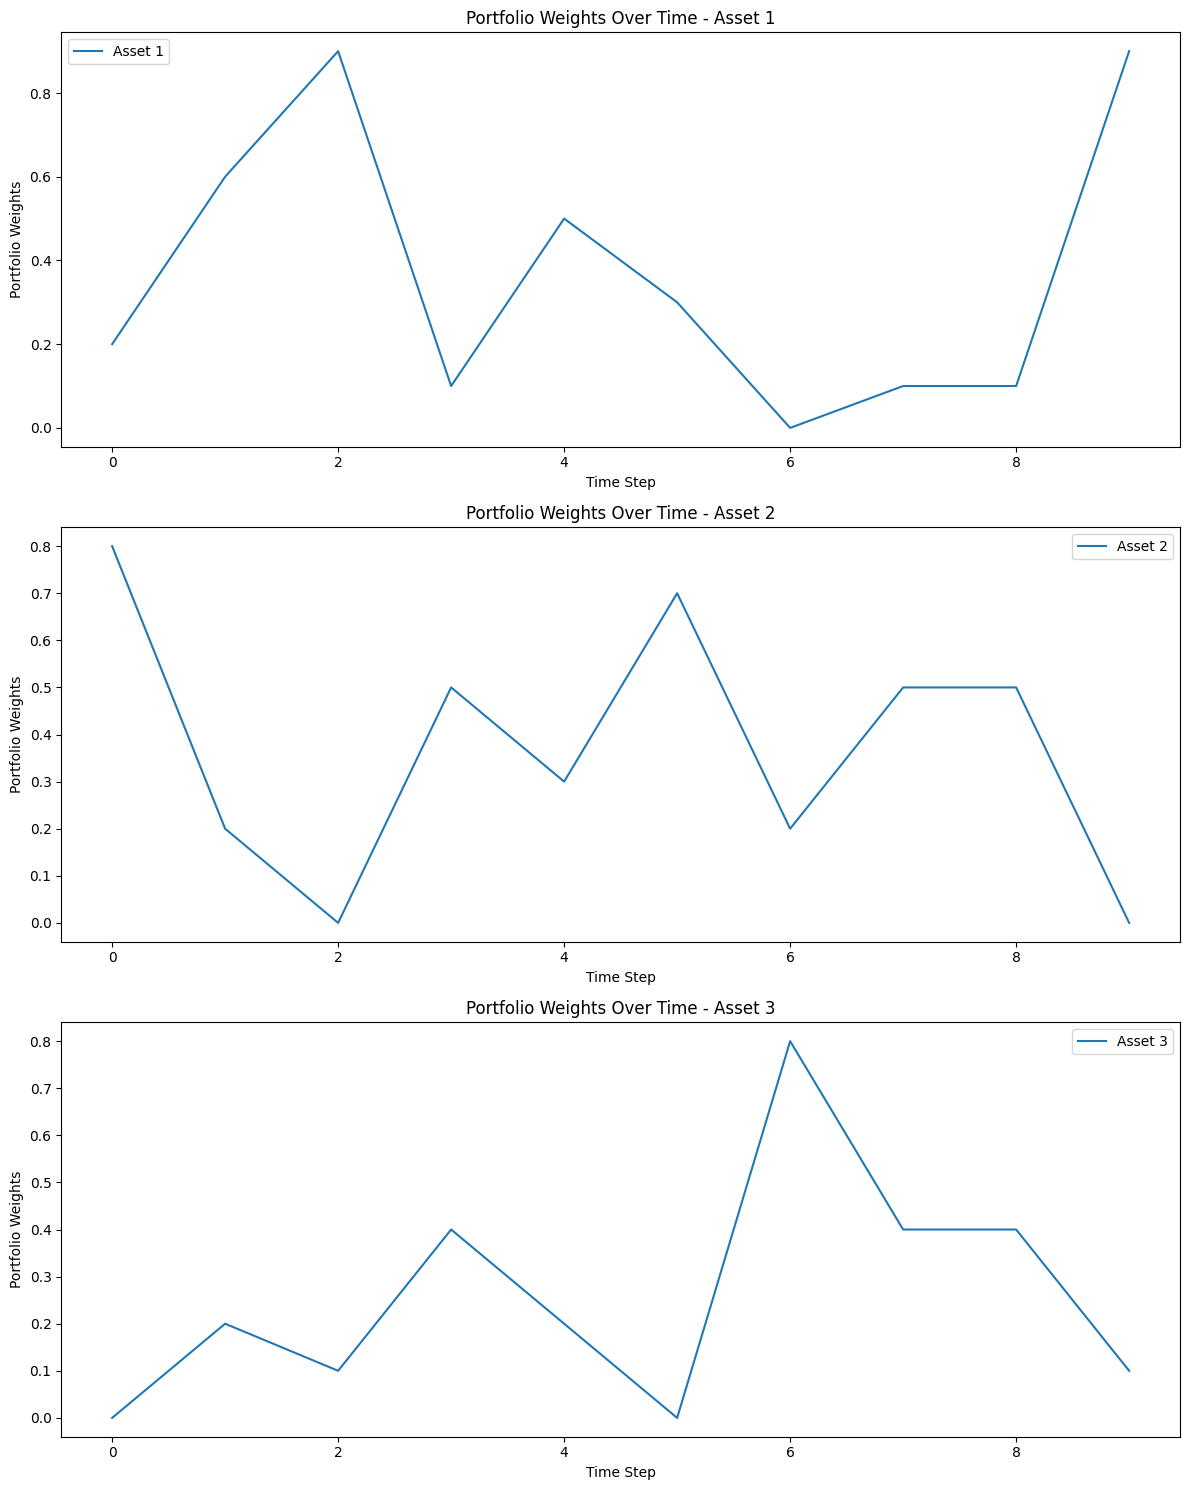

In [69]:
# Plot portfolio weights over time for a single episode, separate plot for each asset
episode_index = 0  # Change this to the desired episode index

portfolio_weights = results[episode_index]["portfolio_weights"]
portfolio_weights = np.array(portfolio_weights)

num_assets = portfolio_weights.shape[1]

plt.figure(figsize=(12, 5 * num_assets))
for j in range(num_assets):
    plt.subplot(num_assets, 1, j + 1)
    plt.plot(range(len(portfolio_weights)), portfolio_weights[:, j], label=f"Asset {j+1}")
    plt.xlabel("Time Step")
    plt.ylabel("Portfolio Weights")
    plt.title(f"Portfolio Weights Over Time - Asset {j+1}")
    plt.legend()

plt.tight_layout()
plt.show()

In [70]:
# Number of actions in action space
envs.single_action_space

Discrete(66)